# Mover Dirichelt Analysis - allowing for need movement

Note that the interactive plots require the jupyter widgets extension for jupyter lab to be installed. This can currently not be managed in a conda env but can be installed using  
`jupyter labextension install @jupyter-widgets/jupyterlab-manager`

Call `help(hm.chart_name)` for information on arguments etc. for each charting function.


In [1]:
import sys
import os
home = os.path.expanduser('~')
sys.path.append(home + '/mc/witan.send.analysis/inference_analysis/')

import heatmaps as hm
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import seaborn as sns
from os import path
import numpy as np

%matplotlib inline

In [25]:
base_dir = home + "/mc/witan.send/data/demo/"

data_dir = base_dir + "data/"
transitions_csv = data_dir + "/transitions.csv"

results_dir = base_dir + "results/" 
results_for_checking_dir = base_dir + "results_for_checking_1000/"

# Model Parameters

In [26]:
ipd.Code(filename=results_for_checking_dir + "runtime-metadata.edn",language='clojure')

{:execution
 {:start {:date "2019-03-15", :time "11:17:30"},
  :end {:date "2019-03-15", :time "11:28:08"}},
 :environment-metadata
 {:model-version "1.7.0",
  :os-name "Linux",
  :os-version "4.18.0-16-generic",
  :clj-version "1.9.0",
  :jvm-version "25.201-b09",
  :git-branch "tdf/joiner-unobserved-ay",
  :git-commit-id "8456d9e",
  :git-url
  "https://github.com/MastodonC/witan.send/commit/8456d9ecabdda451526807f585d0f8ca160adf55"},
 :file-inputs-md5s
 {:transitions "6b1468a38742f54ccb61bccf820dd5df",
  :population "f19179ab601db8325def8a5738d8fe71",
  :costs "396beeefe2c6eeb9aa31b7259bfaac65",
  :valid-states "7f63d89714fd9e6ac3dd71b118589c07"}}

In [27]:
ipd.Code(filename=results_dir + "runtime-metadata.edn",language='clojure')

{:execution
 {:start {:date "2019-03-18", :time "12:05:03"},
  :end {:date "2019-03-18", :time "12:29:59"}},
 :environment-metadata
 {:model-version "1.7.0",
  :os-name "Linux",
  :os-version "4.18.0-16-generic",
  :clj-version "1.9.0",
  :jvm-version "25.201-b09",
  :git-branch "incorperate-needs",
  :git-commit-id "74539b8",
  :git-url
  "https://github.com/MastodonC/witan.send/commit/74539b8fe853db7c3ae1cc126a362c02909e90f2"},
 :file-inputs-md5s
 {:transitions "6b1468a38742f54ccb61bccf820dd5df",
  :population "f19179ab601db8325def8a5738d8fe71",
  :costs "396beeefe2c6eeb9aa31b7259bfaac65",
  :valid-states "7f63d89714fd9e6ac3dd71b118589c07"}}

In [28]:
ipd.Code(filename=results_for_checking_dir + "runtime-config.edn",language='clojure')

{:file-inputs
 {:transitions "data/transitions.csv",
  :population "data/population.csv",
  :costs "data/costs.csv",
  :valid-states "data/valid-states.csv"},
 :scenario-parameters
 {:filter-transitions-from nil,
  :which-transitions? nil,
  :splice-ncy nil,
  :modify-transition-by nil,
  :modify-transitions-from nil},
 :projection-parameters {:random-seed 50, :simulations 1000},
 :output-parameters
 {:run-outputs true,
  :run-charts true,
  :output-dir "results_for_checking_1000",
  :settings-to-exclude-in-charts nil,
  :keep-temp-files? false,
  :use-confidence-bound-or-interval nil,
  :population-file "data/population.csv",
  :project-dir "data/demo"},
 :validation-parameters {:run-validation true, :keep-temp-files? false}}

In [29]:
ipd.Code(filename=results_dir + "runtime-config.edn",language='clojure')

{:file-inputs
 {:transitions "data/transitions.csv",
  :population "data/population.csv",
  :costs "data/costs.csv",
  :valid-states "data/valid-states.csv"},
 :scenario-parameters
 {:filter-transitions-from nil,
  :which-transitions? nil,
  :splice-ncy nil,
  :modify-transition-by nil,
  :modify-transitions-from nil},
 :projection-parameters {:random-seed 50, :simulations 1000},
 :output-parameters
 {:run-outputs true,
  :run-charts true,
  :output-dir "results",
  :settings-to-exclude-in-charts nil,
  :keep-temp-files? false,
  :use-confidence-bound-or-interval nil,
  :population-file "data/population.csv",
  :project-dir "data/demo"},
 :validation-parameters {:run-validation true, :keep-temp-files? false}}

# Transitions

# Transitions

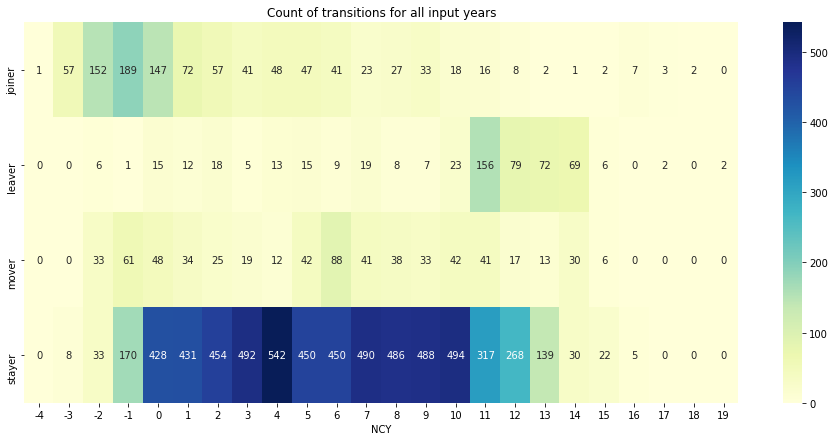

In [30]:
fig, ax = hm.transition_counts(transitions_csv)

In [31]:
hm.mover_dirichlet_v2(results_dir)

interactive(children=(Dropdown(description='need', options=('T', 'U', 'V', 'W', 'X', 'Y'), value='T'), Dropdow…

In [32]:
hm.mover_dirichlet_v2_rollup(results_dir)

interactive(children=(Dropdown(description='need', options=('T', 'U', 'V', 'W', 'X', 'Y'), value='T'), Dropdow…

In [33]:
hm.mover_dirichlet(results_for_checking_dir)

interactive(children=(Dropdown(description='need', options=('T', 'U', 'V', 'W', 'X', 'Y'), value='T'), Dropdow…

# Chart Comparison

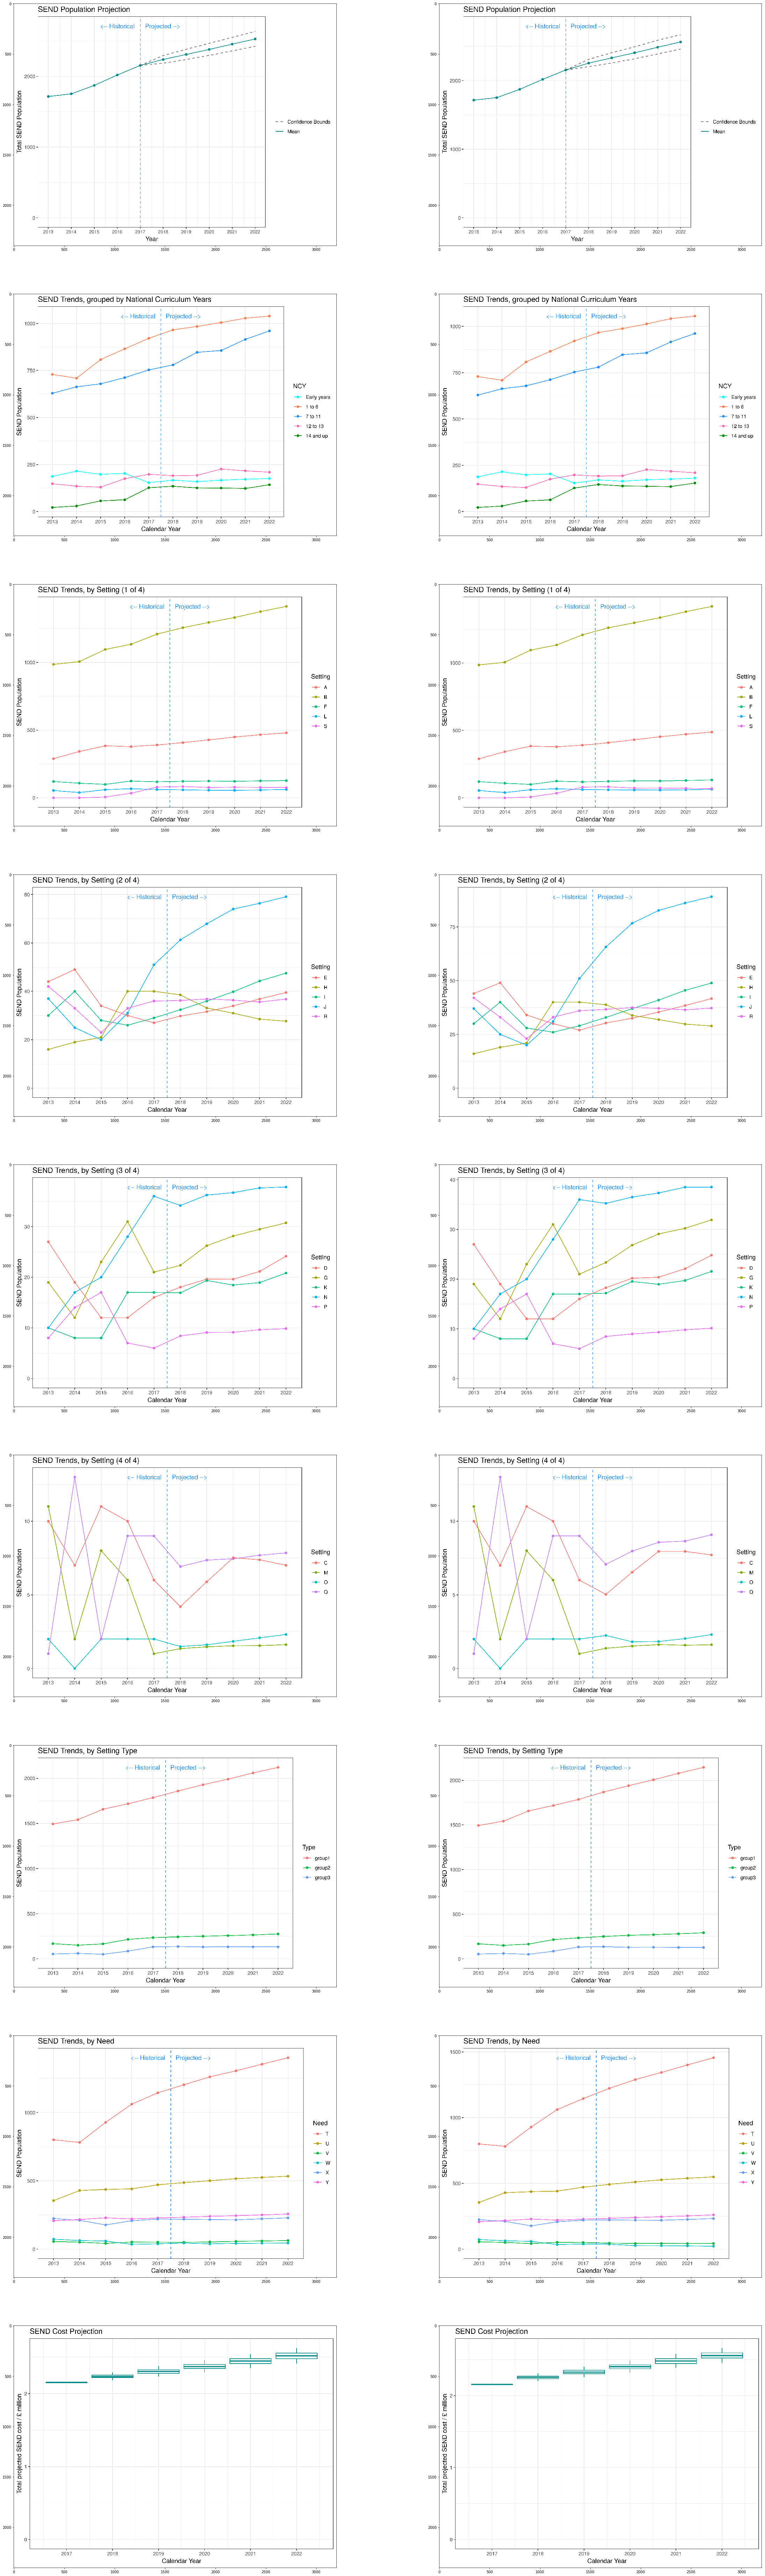

In [34]:
charts = ["Total_Population.png",
          "NCY_Population_Trends.png",
          "Settings_Trends_1.png",
          "Settings_Trends_2.png",
          "Settings_Trends_3.png",
          "Settings_Trends_4.png",
          "Setting_Type_Counts.png",
          "Need_Trends.png",
          "Total_Cost.png"]

fig, ax = plt.subplots(len(charts),2,figsize=(40, len(charts) * 15))

def imagerow(row, filename):
    ax[row,0].imshow(plt.imread(results_dir + filename))
    ax[row,1].imshow(plt.imread(results_for_checking_dir + filename))

for i, filename in enumerate(charts):
    imagerow(i, filename)
    

# Validation Comparison

Functions to work out validation differences

Quick note on validation:
 - three runs
 - 13/14 to predict 15,16,17 (n-transitions 1)
 - 13/14/15 to predict 16/17 (n-transitions 2)
 - 13/14/15/16 to predict 17 (n-transitions 3)
 
 

In [35]:
def analyse_validation(index_cols):
    def fn(path,title):
        df = pd.read_csv(path)
        df = df.set_index(index_cols)
        df = df[['ground-truth','mean']]
        df['diff'] = df['mean'] - df['ground-truth']
        df['fdiff'] = round(df['mean']/df['ground-truth'],3)
        df['fdiff'] = df['fdiff'].fillna(0)
        df.columns = pd.MultiIndex.from_product([[title],df.columns])
        return df
    return fn
    
analyse_count_validation = analyse_validation(['calendar-year', 'n-transition'])
analyse_state_validation = analyse_validation(['calendar-year', 'n-transitions', 'academic-year', 'need-setting'])

### Count Per Calendar Year Differences

In [36]:
results_count = analyse_count_validation(results_dir + "/validation_results_count.csv", "results")
results_for_checking_count = analyse_count_validation(results_for_checking_dir + "/validation_results_count.csv", "results_for_checking")
validation_count = pd.concat([results_for_checking_count, results_count], axis=1)
validation_count

results_for_checking                          \
                                   ground-truth     mean    diff  fdiff   
calendar-year n-transition                                                
2015          1                            1877  1847.08  -29.92  0.984   
2016          1                            2003  1906.32  -96.68  0.952   
2017          1                            2153  1995.16 -157.84  0.927   
2016          2                            2003  2008.80    5.80  1.003   
2017          2                            2153  2115.83  -37.17  0.983   
              3                            2153  2122.72  -30.28  0.986   

                                results                          
                           ground-truth     mean    diff  fdiff  
calendar-year n-transition                                       
2015          1                    1877  1845.01  -31.99  0.983  
2016          1                    2003  1893.93 -109.07  0.946  
2017          1                    2153  1979.99 -173.01  0.920  
2016          2                    2003  2004.37    1.37  1.001  
2017          2                    2153  2102.75  -50.25  0.977  
              3                    2153  2107.38  -45.62  0.979

Are all results below a perentage threshold difference?

In [37]:
pdiff_threshold = 1 # percentage difference between validation
validation_count[100 * (validation_count['results_for_checking','fdiff'] - validation_count['results','fdiff']).abs() > pdiff_threshold].empty

True

note: this may be a better check than the current md5sum based acceptance test in the model

### State Differences

In [38]:
results_state = analyse_state_validation(results_dir + "/validation_results_state.csv", "results")
results_for_checking_state = analyse_state_validation(results_for_checking_dir + "/validation_results_state.csv", "results_for_checking")
validation_state = pd.concat([results_for_checking_state, results_state], axis=1)
validation_state.head(10)

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2015          1             0             T-K                             0   
                            11            Y-F                             0   
                            4             V-H                             0   
                            8             Y-R                             0   
                            15            U-E                             0   
                            3             W-E                             0   
                            9             U-C                             0   
                            11            V-I                             1   
                            0             V-O                             0   
                            10            V-L                             0   

                                                                              \
                                                        mean  diff     fdiff   
calendar-year n-transitions academic-year need-setting                         
2015          1             0             T-K           1.36  1.36       inf   
                            11            Y-F           0.03  0.03       inf   
                            4             V-H           0.01  0.01       inf   
                            8             Y-R           0.02  0.02       inf   
                            15            U-E           0.00  0.00  0.000000   
                            3             W-E           0.01  0.01       inf   
                            9             U-C           0.01  0.01       inf   
                            11            V-I           1.86  0.86  1.860000   
                            0             V-O           0.01  0.01       inf   
                            10            V-L           0.02  0.02       inf   

                                                            results        \
                                                       ground-truth  mean   
calendar-year n-transitions academic-year need-setting                      
2015          1             0             T-K                     0  0.96   
                            11            Y-F                     0  0.09   
                            4             V-H                     0  0.03   
                            8             Y-R                     0  0.01   
                            15            U-E                     0  0.00   
                            3             W-E                     0  0.15   
                            9             U-C                     0  0.01   
                            11            V-I                     1  1.84   
                            0             V-O                     0  0.02   
                            10            V-L                     0  0.01   

                                                                        
                                                        diff     fdiff  
calendar-year n-transitions academic-year need-setting                  
2015          1             0             T-K           0.96       inf  
                            11            Y-F           0.09       inf  
                            4             V-H           0.03       inf  
                            8             Y-R           0.01       inf  
                            15            U-E           0.00  0.000000  
                            3             W-E           0.15       inf  
                            9             U-C           0.01       inf  
                            11            V-I           0.84  1.840000  
                            0             V-O           0.02       inf  
                            10            V-L           0.01       inf

In [55]:
pdiff_threshold = 1 # percentage difference between validation
diff_threshold = 3 # population difference between validation

percentage_mask = 100 * (validation_state['results_for_checking','fdiff'] - validation_state['results','fdiff']).abs() > pdiff_threshold
diff_mask = (validation_state['results_for_checking', 'diff'] - validation_state['results','diff']).abs() > diff_threshold
validation_state[percentage_mask & diff_mask].empty

False

#### Which States are >4 pop difference and > 1% different?

In [56]:
validation_state[percentage_mask & diff_mask]

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2017          3             0             Y-F                             8   

                                                                           \
                                                        mean  diff  fdiff   
calendar-year n-transitions academic-year need-setting                      
2017          3             0             Y-F           5.61 -2.39  0.701   

                                                            results        \
                                                       ground-truth  mean   
calendar-year n-transitions academic-year need-setting                      
2017          3             0             Y-F                     8  2.42   

                                                                     
                                                        diff  fdiff  
calendar-year n-transitions academic-year need-setting               
2017          3             0             Y-F          -5.58  0.302

What percentage are different by this much?

In [57]:
100 * validation_state[percentage_mask & diff_mask].shape[0]/validation_state.shape[0]

0.011384335154826957

What percentage is the model better than or equal to the current results?

In [58]:
better_fdiff_mask = ((1 - validation_state['results_for_checking', 'fdiff']).abs() >= (1 - validation_state['results','fdiff']).abs())
100 * validation_state[better_fdiff_mask].shape[0] / validation_state.shape[0]

84.19854280510019

In [65]:
validation_state[~better_fdiff_mask].head(10)

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2015          1              10           W-B                             3   
                             16           Y-S                             0   
                             10           X-I                             4   
                             11           W-I                             1   
                             16           U-S                             0   
                             8            T-K                             2   
                             2            T-J                             2   
                            -1            Y-F                             3   
                             4            T-J                             3   
                             8            X-M                             1   

                                                                           \
                                                        mean  diff  fdiff   
calendar-year n-transitions academic-year need-setting                      
2015          1              10           W-B           1.88 -1.12  0.627   
                             16           Y-S           0.00  0.00  0.000   
                             10           X-I           1.76 -2.24  0.440   
                             11           W-I           0.01 -0.99  0.010   
                             16           U-S           0.00  0.00  0.000   
                             8            T-K           0.03 -1.97  0.015   
                             2            T-J           1.98 -0.02  0.990   
                            -1            Y-F           1.33 -1.67  0.443   
                             4            T-J           1.02 -1.98  0.340   
                             8            X-M           2.58  1.58  2.580   

                                                            results        \
                                                       ground-truth  mean   
calendar-year n-transitions academic-year need-setting                      
2015          1              10           W-B                     3  1.85   
                             16           Y-S                     0  0.03   
                             10           X-I                     4  1.69   
                             11           W-I                     1  0.00   
                             16           U-S                     0  0.05   
                             8            T-K                     2  0.01   
                             2            T-J                     2  1.95   
                            -1            Y-F                     3  1.20   
                             4            T-J                     3  0.96   
                             8            X-M                     1  2.62   

                                                                        
                                                        diff     fdiff  
calendar-year n-transitions academic-year need-setting                  
2015          1              10           W-B          -1.15  0.617000  
                             16           Y-S           0.03       inf  
                             10           X-I          -2.31  0.422000  
                             11           W-I          -1.00  0.000000  
                             16           U-S           0.05       inf  
                             8            T-K          -1.99  0.005000  
                             2            T-J          -0.05  0.975000  
                            -1            Y-F          -1.80  0.400000  
                             4            T-J          -2.04  0.320000  
                             8            X-M           1.62  2.620000

We've introduced movements that now have priors which result in a non-zero result compared to the ground-truth.

In [60]:
inf_fdiff_mask = (validation_state["results", "fdiff"] == np.inf) & (validation_state["results_for_checking", "mean"] == 0)
new_means = validation_state[inf_fdiff_mask]
new_means.shape[0]

352

In [61]:
new_means['results', 'mean'].max()

0.53

In [62]:
100 * validation_state[inf_fdiff_mask].shape[0] / validation_state.shape[0]

4.007285974499089

In 4% of cases we've introduced an fdiff of infinity ie. where the ground truth is zero there now is a predicted value greater than zero.  Of these 352 cases the introduced pouplation addition is never more than 0.53 pupils i.e, always < 1 person.

In [63]:
100 * validation_state[better_fdiff_mask & ~inf_fdiff_mask].shape[0] / validation_state[~inf_fdiff_mask].shape[0]

87.7134724857685

Where we have *not* introduced an infinite fdiff the model is closer to ground-truth in 87% of the cases.

# Conclusions



With little or no observations the distributions over movement between need and setting is significantly impacted.  However this is mitigated almost entirely by the fact that these same settings/need combinations nearly always have zero population.

The mover dirichlet calculation is now based off of valid settings leading to the removal of columns previously calculated that arguably shouldn't have been.  This means that the lookup from this datastructure can now be used to determine if we should add the population to a state.

The model is closer to ground-truth 84% of the time.